In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aimdatathon2020/Nutrient Calc.csv
/kaggle/input/aimdatathon2020/Multivitamins.csv
/kaggle/input/aimdatathon2020/Smoking History.csv
/kaggle/input/aimdatathon2020/MedicationUseHistory.csv
/kaggle/input/aimdatathon2020/Beverages.csv
/kaggle/input/aimdatathon2020/Background and Helpful Info.csv
/kaggle/input/aimdatathon2020/Exercise.csv
/kaggle/input/aimdatathon2020/MedicalHistory.csv
/kaggle/input/aimdatathon2020/Tumor Information_test.csv
/kaggle/input/aimdatathon2020/Lifetime use of Supplements.csv
/kaggle/input/aimdatathon2020/Current Lifestyle.csv
/kaggle/input/aimdatathon2020/Tumor Information_train.csv
/kaggle/input/aimdatathon2020/Food Habits.csv
/kaggle/input/aimdatathon2020/WomensHealth.csv
/kaggle/input/aimdatathon2020/Foods.csv
/kaggle/input/aimdatathon2020/Family History.csv
/kaggle/input/aimdatathon2020/Vitamins Minerals.csv
/kaggle/input/aimdatathon2020/Herbals.csv
/kaggle/input/aimdatathon2020/DBBR Questionnaire Data Dictionary.csv


In [2]:
import plotly.express as px

In [3]:
#Get a list of all files as dataframes

All_files = {}
for file in os.scandir('../input/aimdatathon2020'):
    
    key = str(os.path.basename(file)).split('.')[0]
    
    All_files[key]=(pd.read_csv(file))
    
    All_files[key].rename(str.upper,axis='columns',inplace=True)
    

In [4]:
#View all file names
All_files.keys()

dict_keys(['Nutrient Calc', 'Multivitamins', 'Smoking History', 'MedicationUseHistory', 'Beverages', 'Background and Helpful Info', 'Exercise', 'MedicalHistory', 'Tumor Information_test', 'Lifetime use of Supplements', 'Current Lifestyle', 'Tumor Information_train', 'Food Habits', 'WomensHealth', 'Foods', 'Family History', 'Vitamins Minerals', 'Herbals', 'DBBR Questionnaire Data Dictionary'])

In [5]:
#Count how many variables there are across all surveys
var_count = 0

for key in All_files:
    var_count+=All_files[key].shape[1]
    
var_count

1249

In [6]:
#Create a lambda function to help combine all dataframes
join_all = lambda df1,df2: df1.merge(right = df2, how = 'outer', on = 'QBARCODE' )

In [7]:
import functools

In [8]:
#Make a list of the Survey dataframes for use in reduce function
Survey_list = list(All_files.values())
Survey_list.pop()

,SECTIONID,SECTIONNAME,QUESTION,QUESTIONIDMALE,QUESTIONIDFEMALE,FIELDID,RESPONSEID,VARNAME,VARIABLE,RESPONSETYPE,RESPONSE,RESPONSEVALUE,DERIVEDVARIABLE,VARIABLECALC
0,1,BackgroundAndHelpfulInformation,NaN,NaN,NaN,1,1,Qbarcode,Questionnaire Barcode Label,Form Value,[Value],000000100-000999999,False,NaN
1,1,BackgroundAndHelpfulInformation,NaN,NaN,NaN,2,2,Sex,Sex,Form Value,Male,1,False,NaN
2,1,BackgroundAndHelpfulInformation,NaN,NaN,NaN,2,3,Sex,Sex,Form Value,Female,2,False,NaN
3,1,BackgroundAndHelpfulInformation,What is your date of birth?,1.0,1.0,5,8,DOBYear,Year of Birth,Write In (numeric),[Value],1900-1999,False,NaN
4,1,BackgroundAndHelpfulInformation,What is your date of birth?,1.0,1.0,5,9,DOBYear,Year of Birth,Write In (numeric),[No response],NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,17,WomensHealth,Have you ever used estrogen (hormone) replacem...,0.0,47.0,1250,5442,HRTNow,Do you take HRT now?,Optical Mark Recognition,[No response],99,False,NaN
5417,17,WomensHealth,NaN,NaN,NaN,1251,5443,Menopause,Menopausal status,Calculated,Premenopausal,0,True,"if MLastYr in {1,2}, then =0, else if MLastYr=..."
5418,17,WomensHealth,NaN,NaN,NaN,1251,5444,Menopause,Menopausal status,Calculated,Postmenopausal,1,True,"if MLastYr in {1,2}, then =0, else if MLastYr=..."
5419,17,WomensHealth,NaN,NaN,NaN,1251,5445,Menopause,Menopausal status,Calculated,Not applicable,66,True,"if MLastYr in {1,2}, then =0, else if MLastYr=..."


In [9]:
#Combine all surveys into one, make a separate dataframe with the classes of the training set, so it can eventually be omitted from the dataframe of predictors
Combined_df = functools.reduce(join_all,Survey_list)

Class = pd.DataFrame(Combined_df[['QBARCODE','PATIENTSTATUS']])
barcs = pd.DataFrame(Combined_df['QBARCODE'])

In [10]:
#Want to be able to see how many patients for each column did not fill in an answer for the column.
#This loop only adds columns that have any null answers
#Because of the test train split two separate columns were made for answers that are in both, such as primary site x and y. These were not added because the columns being split make NAs appear
#Patient Status only exists for train and thus has nas for the train people, so it is also not being counted for this
#Make a list for columns with too many NAs, to omit.
#Make a list of columns with few NAs, to fill
omit = []
NA_dict = {}
NA_fill = []
for column in Combined_df:
    
    percent_null =  Combined_df[column].isnull().sum()/2000
    
    if percent_null != 0 and not ('x' in column or 'y' in column) and column != 'PATIENTSTATUS':
    
        NA_dict[column] = percent_null
        
        if percent_null > .3:
            omit.append(column)
        else:
            NA_fill.append(column)
        

In [11]:
#Drop columns with too many NAs
NA_dropped = Combined_df.drop(columns = omit)

In [12]:
#Take out class we're trying to predict
Class_dropped = NA_dropped.drop(columns = ['PATIENTSTATUS'])

In [13]:
#Make a dictionary so we can easily fill NAs in certain columns with mode of column
mode_list = [Class_dropped[col].mode()[0] for col in NA_fill ]
NA_fill_dict = dict(zip(NA_fill,mode_list))

In [14]:
#Fill NAs in specified columns
NA_filled = Class_dropped.fillna(value = NA_fill_dict)

In [15]:
#Find which columns have x and y in them in order to tell where the test/ train overlap happened. Turns out there were also multiple columns called iron and zinc.
#The iron and zinc ones are actually different though, so we don't need to do anythin with them

xy_list = sorted(list(filter(lambda col: ('x' in col or 'y' in col) ,NA_filled)))


In [16]:
#Make a list of the dataframes of the xys
xy_dfs = []
for col in xy_list:
    xy_dfs.append(pd.DataFrame(NA_filled[col]))
    

In [17]:
#Combine the x and y column into one column for the columns that are separated in the test/ train split

comb_test_train = pd.DataFrame(index = range(NA_filled.shape[0]))

for i in range(0,len(xy_dfs)-1, 2):
    
    col = xy_list[i]
    
    if 'IRON' not in col and 'ZINC' not in col:
        
        xy_dfs[i+1].columns = xy_dfs[i].columns
        
        comb_df = xy_dfs[i].combine_first(xy_dfs[i+1])
        
        comb_test_train = pd.concat([comb_test_train,comb_df],axis=1)
        
        

In [18]:
# Make and view list of columns in test and training surveys, to be omitted from overall dataframe
test_train_list = list(filter(lambda col: ('IRON' not in col and 'ZINC'not in col),xy_list))
test_train_list

['GRADE_x',
 'GRADE_y',
 'HISTOLOGY_x',
 'HISTOLOGY_y',
 'PRIMARYSITE_x',
 'PRIMARYSITE_y',
 'SEERSUMMSTAGE2000_x',
 'SEERSUMMSTAGE2000_y']

In [19]:
# Drop desired columns from overall dataframe. Also record which Barcodes are test and train for easy merges later
Test_train_dropped = NA_filled.drop(test_train_list,axis='columns')
train_barcodes = pd.DataFrame(All_files['Tumor Information_train']['QBARCODE'])
test_barcodes =  pd.DataFrame(All_files['Tumor Information_test']['QBARCODE'])

In [20]:
#Make and view dataframe with combined test and train  data back in 

Full_pred = pd.concat([Test_train_dropped,comb_test_train],axis=1)
Full_pred

,QBARCODE,ENERGY,PROTEIN,TOTAL LIPID (FAT),"CARBOHYDRATE, BY DIFFERENCE",TOTAL DIETARY FIBER,TOTAL SUGARS,CALCIUM,IRON_x,MAGNESIUM,...,SOYDAYS,SOYNOW,SJW,SJWYRS,SJWDAYS,SJWNOW,GRADE_x,HISTOLOGY_x,PRIMARYSITE_x,SEERSUMMSTAGE2000_x
0,100,2611.437774,120.763868,83.299809,352.943254,23.648236,172.397855,2354.567345,16.565900,497.124902,...,66,66,0,66,66,66,"Grade III: Poorly differentiated, dedifferenti...","Infiltrating duct carcinoma, NOS","Breast, lower-inner quadrant",3.0
1,102,3289.887079,115.554945,136.265284,410.163350,26.031804,141.958303,1414.942384,23.162942,492.534682,...,66,66,1,1,3,0,"Grade II: Mod diff, mod well diff, intermediat...",Infiltrating duct and lobular carcinoma,"Breast, upper-outer quadrant",1.0
2,104,826.437009,34.843074,31.418111,102.186425,5.854263,21.392043,335.060640,6.922756,141.952095,...,66,66,0,66,66,66,"Grade III: Poorly differentiated, dedifferenti...","Infiltrating duct carcinoma, NOS","Breast, upper-outer quadrant",3.0
3,105,2400.432048,99.299475,83.565226,315.729899,22.720838,99.060080,1876.663622,18.569845,487.534547,...,66,66,0,66,66,66,"Grade I: Well differentiated, differentiated, NOS","Infiltrating duct carcinoma, NOS","Breast, lower-inner quadrant",1.0
4,106,2493.679652,113.835182,119.499360,244.865142,16.965896,116.426268,1684.989155,14.349756,403.145982,...,66,66,2,3,3,1,"Grade III: Poorly differentiated, dedifferenti...","Infiltrating duct carcinoma, NOS","Breast, upper-inner quadrant",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,26291,1172.701223,43.512830,54.796257,127.530264,7.938282,29.784761,547.824920,7.663847,155.051095,...,66,66,0,66,66,66,"Grade II: Mod diff, mod well diff, intermediat...","Adenocarcinoma, NOS",Prostate gland,2.0
1996,26502,2102.200135,62.636931,100.266038,227.869133,17.828513,49.734443,871.194430,10.561220,329.396393,...,66,66,0,66,66,66,"Grade III: Poorly differentiated, dedifferenti...","Adenocarcinoma, NOS","Lung, upper lobe",4.0
1997,26534,1703.051903,78.803729,59.360196,184.974334,17.710722,79.723526,1117.951140,12.782537,307.259330,...,66,66,0,66,66,66,"Grade IV: Undifferentiated, anaplastic","Papillary urothelial carcinoma, non-invasive","Bladder wall, NOS",0.0
1998,26605,1094.199829,46.928196,40.142876,116.692151,7.225863,37.693657,801.264988,6.887634,191.999359,...,66,66,0,66,66,66,"Grade II: Mod diff, mod well diff, intermediat...","Adenocarcinoma, NOS",Rectosigmoid colon,3.0


In [21]:
Full_pred_train = train_barcodes.merge(Full_pred, on = 'QBARCODE')

In [22]:
str_list = []
for col in Full_pred:
    
    if Full_pred[col].dtype == 'O':
        
        str_list.append(col)
        

In [23]:
pre_enc = Full_pred[str_list]

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [25]:
#Encode string columns

oh_enc = OneHotEncoder().fit(pre_enc)

enc_names = oh_enc.get_feature_names()

enc = pd.DataFrame(oh_enc.transform(pre_enc).toarray(),columns = enc_names)

In [26]:
#Recombine encoded columns, and remove barcode so it doesn't get scaled in next block
enc_frame = pd.concat([Full_pred.drop(str_list,axis=1), enc],axis = 1)
enc_frame.drop('QBARCODE',axis=1,inplace=True)

In [27]:
#Scale values
scale_fit = StandardScaler().fit(enc_frame)

scale_frame = pd.DataFrame(scale_fit.transform(enc_frame),columns = enc_frame.columns)

In [28]:
scale_frame

,ENERGY,PROTEIN,TOTAL LIPID (FAT),"CARBOHYDRATE, BY DIFFERENCE",TOTAL DIETARY FIBER,TOTAL SUGARS,CALCIUM,IRON_x,MAGNESIUM,PHOSPHORUS,...,"x6_Tongue, base of, NOS","x6_Tongue, dorsal surface, NOS","x6_Tongue, ventral surface, NOS","x6_Tonsil, NOS",x6_Ureter,x6_Urethra,"x6_Urinary system, NOS","x6_Vagina, NOS","x6_Vulva, NOS","x6_Vulva, overlapping lesion"
0,0.775562,1.250977,0.316056,0.999139,0.674078,1.344663,1.631422,0.438642,1.065448,1.623827,...,-0.022366,-0.022366,-0.022366,-0.038759,-0.050063,-0.031639,-0.022366,-0.022366,-0.054855,-0.022366
1,1.467955,1.113765,1.504395,1.463277,0.929916,0.829075,0.404658,1.411397,1.036792,0.854105,...,-0.022366,-0.022366,-0.022366,-0.038759,-0.050063,-0.031639,-0.022366,-0.022366,-0.054855,-0.022366
2,-1.046124,-1.012327,-0.847966,-1.034860,-1.235828,-1.213085,-1.005223,-0.983269,-1.151858,-1.105343,...,-0.022366,-0.022366,-0.022366,-0.038759,-0.050063,-0.031639,-0.022366,-0.022366,-0.054855,-0.022366
3,0.560220,0.685567,0.322011,0.697285,0.574536,0.102462,1.007476,0.734130,1.005577,0.779866,...,-0.022366,-0.022366,-0.022366,-0.038759,-0.050063,-0.031639,-0.022366,-0.022366,-0.054855,-0.022366
4,0.655384,1.068463,1.128233,0.122470,-0.043167,0.396612,0.757228,0.111865,0.478748,0.991786,...,-0.022366,-0.022366,-0.022366,-0.038759,-0.050063,-0.031639,-0.022366,-0.022366,-0.054855,-0.022366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.692743,-0.783950,-0.323452,-0.829285,-1.012141,-1.070928,-0.727440,-0.873993,-1.070082,-0.784371,...,-0.022366,-0.022366,-0.022366,-0.038759,-0.050063,-0.031639,-0.022366,-0.022366,-0.054855,-0.022366
1996,0.255859,-0.280188,0.696712,-0.015392,0.049421,-0.733019,-0.305253,-0.446766,0.018337,-0.151994,...,-0.022366,-0.022366,-0.022366,-0.038759,-0.050063,-0.031639,-0.022366,-0.022366,-0.054855,-0.022366
1997,-0.151493,0.145674,-0.221055,-0.363331,0.036778,-0.225062,0.016910,-0.119226,-0.119862,0.140463,...,-0.022366,-0.022366,-0.022366,-0.038759,-0.050063,-0.031639,-0.022366,-0.022366,-0.054855,-0.022366
1998,-0.772858,-0.693983,-0.652217,-0.917198,-1.088608,-0.936967,-0.396552,-0.988448,-0.839418,-0.627763,...,-0.022366,-0.022366,-0.022366,-0.038759,-0.050063,-0.031639,-0.022366,-0.022366,-0.054855,-0.022366


In [29]:
#Checking to see if columns are too homogenous. This would mean that most of the values in the column are the same. Current threshold is that if over 96% are the same
#then it gets added to list to omit

#This also acts to get rid of infrequent string answers, as they would have few binary 1s triggered in there individual column after encoding. Some of this information may be useful,
# like some cancer locations, but it would need transformation first. For example, Colon and Colon overlapping lesion could be both named colon, but this would take time that 
#I don't think I currently have.

homo = []

for col in scale_frame:
    
    most_freq = scale_frame[col].value_counts(True).values[0]
    
    if most_freq >.95:
        
        homo.append(col)
        

In [30]:
het_frame = scale_frame.drop(homo,axis=1)

In [31]:
het_frame

,ENERGY,PROTEIN,TOTAL LIPID (FAT),"CARBOHYDRATE, BY DIFFERENCE",TOTAL DIETARY FIBER,TOTAL SUGARS,CALCIUM,IRON_x,MAGNESIUM,PHOSPHORUS,...,"x4_Grade I: Well differentiated, differentiated, NOS","x4_Grade II: Mod diff, mod well diff, intermediate diff","x4_Grade III: Poorly differentiated, dedifferentiated","x5_Adenocarcinoma, NOS","x5_Infiltrating duct carcinoma, NOS","x6_Breast, overlapping lesion","x6_Breast, upper-inner quadrant","x6_Breast, upper-outer quadrant","x6_Kidney, NOS",x6_Prostate gland
0,0.775562,1.250977,0.316056,0.999139,0.674078,1.344663,1.631422,0.438642,1.065448,1.623827,...,-0.445334,-0.865015,1.269238,-0.659333,1.619626,-0.320212,-0.230621,-0.421730,-0.253764,-0.477229
1,1.467955,1.113765,1.504395,1.463277,0.929916,0.829075,0.404658,1.411397,1.036792,0.854105,...,-0.445334,1.156049,-0.787874,-0.659333,-0.617426,-0.320212,-0.230621,2.371185,-0.253764,-0.477229
2,-1.046124,-1.012327,-0.847966,-1.034860,-1.235828,-1.213085,-1.005223,-0.983269,-1.151858,-1.105343,...,-0.445334,-0.865015,1.269238,-0.659333,1.619626,-0.320212,-0.230621,2.371185,-0.253764,-0.477229
3,0.560220,0.685567,0.322011,0.697285,0.574536,0.102462,1.007476,0.734130,1.005577,0.779866,...,2.245506,-0.865015,-0.787874,-0.659333,1.619626,-0.320212,-0.230621,-0.421730,-0.253764,-0.477229
4,0.655384,1.068463,1.128233,0.122470,-0.043167,0.396612,0.757228,0.111865,0.478748,0.991786,...,-0.445334,-0.865015,1.269238,-0.659333,1.619626,-0.320212,4.336125,-0.421730,-0.253764,-0.477229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.692743,-0.783950,-0.323452,-0.829285,-1.012141,-1.070928,-0.727440,-0.873993,-1.070082,-0.784371,...,-0.445334,1.156049,-0.787874,1.516684,-0.617426,-0.320212,-0.230621,-0.421730,-0.253764,2.095432
1996,0.255859,-0.280188,0.696712,-0.015392,0.049421,-0.733019,-0.305253,-0.446766,0.018337,-0.151994,...,-0.445334,-0.865015,1.269238,1.516684,-0.617426,-0.320212,-0.230621,-0.421730,-0.253764,-0.477229
1997,-0.151493,0.145674,-0.221055,-0.363331,0.036778,-0.225062,0.016910,-0.119226,-0.119862,0.140463,...,-0.445334,-0.865015,-0.787874,-0.659333,-0.617426,-0.320212,-0.230621,-0.421730,-0.253764,-0.477229
1998,-0.772858,-0.693983,-0.652217,-0.917198,-1.088608,-0.936967,-0.396552,-0.988448,-0.839418,-0.627763,...,-0.445334,1.156049,-0.787874,1.516684,-0.617426,-0.320212,-0.230621,-0.421730,-0.253764,-0.477229


In [32]:
barc_het_frame = pd.concat([barcs,het_frame],axis=1)

In [33]:
clean_train = train_barcodes.merge(barc_het_frame, on = 'QBARCODE')

In [34]:
train_class = train_barcodes.merge(Class, on = 'QBARCODE')

In [35]:
from sklearn.model_selection import train_test_split
from  sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
X_train,X_test,y_train,y_test = train_test_split(clean_train,train_class,test_size=.2,random_state = 93048)

X_train.drop('QBARCODE', axis = 1, inplace = True)
X_test.drop('QBARCODE', axis = 1, inplace = True)
y_train.drop('QBARCODE', axis = 1, inplace = True)
y_test.drop('QBARCODE', axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
#Do feature selection based on the outcomes of random forests with 200 trees
log_selector = RFECV(estimator = RandomForestClassifier(200), step = 25,min_features_to_select = 25,n_jobs=-1).fit(X_train,np.ravel(y_train['PATIENTSTATUS']))

In [38]:
#Get which columns are used for naming
log_sel_ind = log_selector.get_support()

In [39]:
#Selected Columns
sel_columns = X_train.columns[log_sel_ind]

In [40]:
y_hat = log_selector.predict(X_test)
y_score = log_selector.predict_proba(X_test)[:,1]

In [41]:
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_roc_curve

In [42]:
pd.DataFrame(confusion_matrix(y_test,y_hat))

,0,1
0,46,72
1,15,187


In [43]:
roc_auc_score(y_test,y_score)

0.7594185265984226

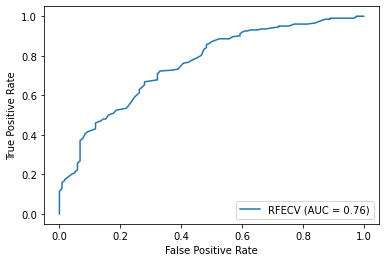

In [44]:
plot_roc_curve(log_selector,X_test,y_test)

In [45]:
#Now to predict the test set based on the selector
test_samples = test_barcodes.merge(barc_het_frame, on = 'QBARCODE')
test_samples.drop('QBARCODE', axis=1, inplace= True)

In [46]:
submission_preds = pd.DataFrame(log_selector.predict_proba(test_samples)[:,1], columns = ["PatientStatus"])

In [47]:
submission = pd.concat([test_barcodes, submission_preds], axis = 1 )
submission.columns = ['qbarcode',"PatientStatus"]

In [48]:
submission.to_csv('Good_submission.csv', index = False)